### Import basic modules

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Import dataset

In [17]:
# df = pd.read_csv('data/Dataset.csv')

### I/ Data cleansing (and export)
 
Using our speculations, deductions and conclusions in documentation/cleansing.md report, we would like to introduce some cleansing methods for this datasets as shown below. 

In [18]:
# import modules.cleansing as cl

# df = cl.remove_columns(df, ['PATIENT_TYPE'])
# df = cl.remove_invalid_values(df)
# df = cl.mapping_bool_values(df=df, excluded_columns=['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED', 'AGE', 'CLASIFFICATION_FINAL'])
# df_original = df.copy()
# df = cl.remove_outliers(df, 'AGE')
# df = cl.impute_missing_values(df=df, excluded_columns=['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED', 'AGE'])

In [19]:
# df.to_csv('data/Dataset_revised_new.csv', index=False)
# df_original.to_csv('data/Dataset_revised_org.csv', index=False)
# df.describe()

### II/ Descriptive Statistics and Data Visualisation: 
 


In [20]:
df_original = pd.read_csv('data/Dataset_revised_org.csv')
df = pd.read_csv('data/Dataset_revised_new.csv')

/tmp/ipykernel_268750/2795104614.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('data/Dataset_revised_org.csv')


In [21]:
new_column_list = []
for column in df.columns:
    if column not in ['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED']:
        new_column_list.append(column)

analytics_df = df[new_column_list].copy()
analytics_df

,SEX,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2.0,1.0,0.0,55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1,1.0,0.0,1.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2,1.0,0.0,0.0,37,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0
3,1.0,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,2.0,0.0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194338,1.0,0.0,1.0,61,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
194339,1.0,0.0,1.0,63,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0
194340,1.0,0.0,0.0,23,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0
194341,1.0,0.0,0.0,56,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0


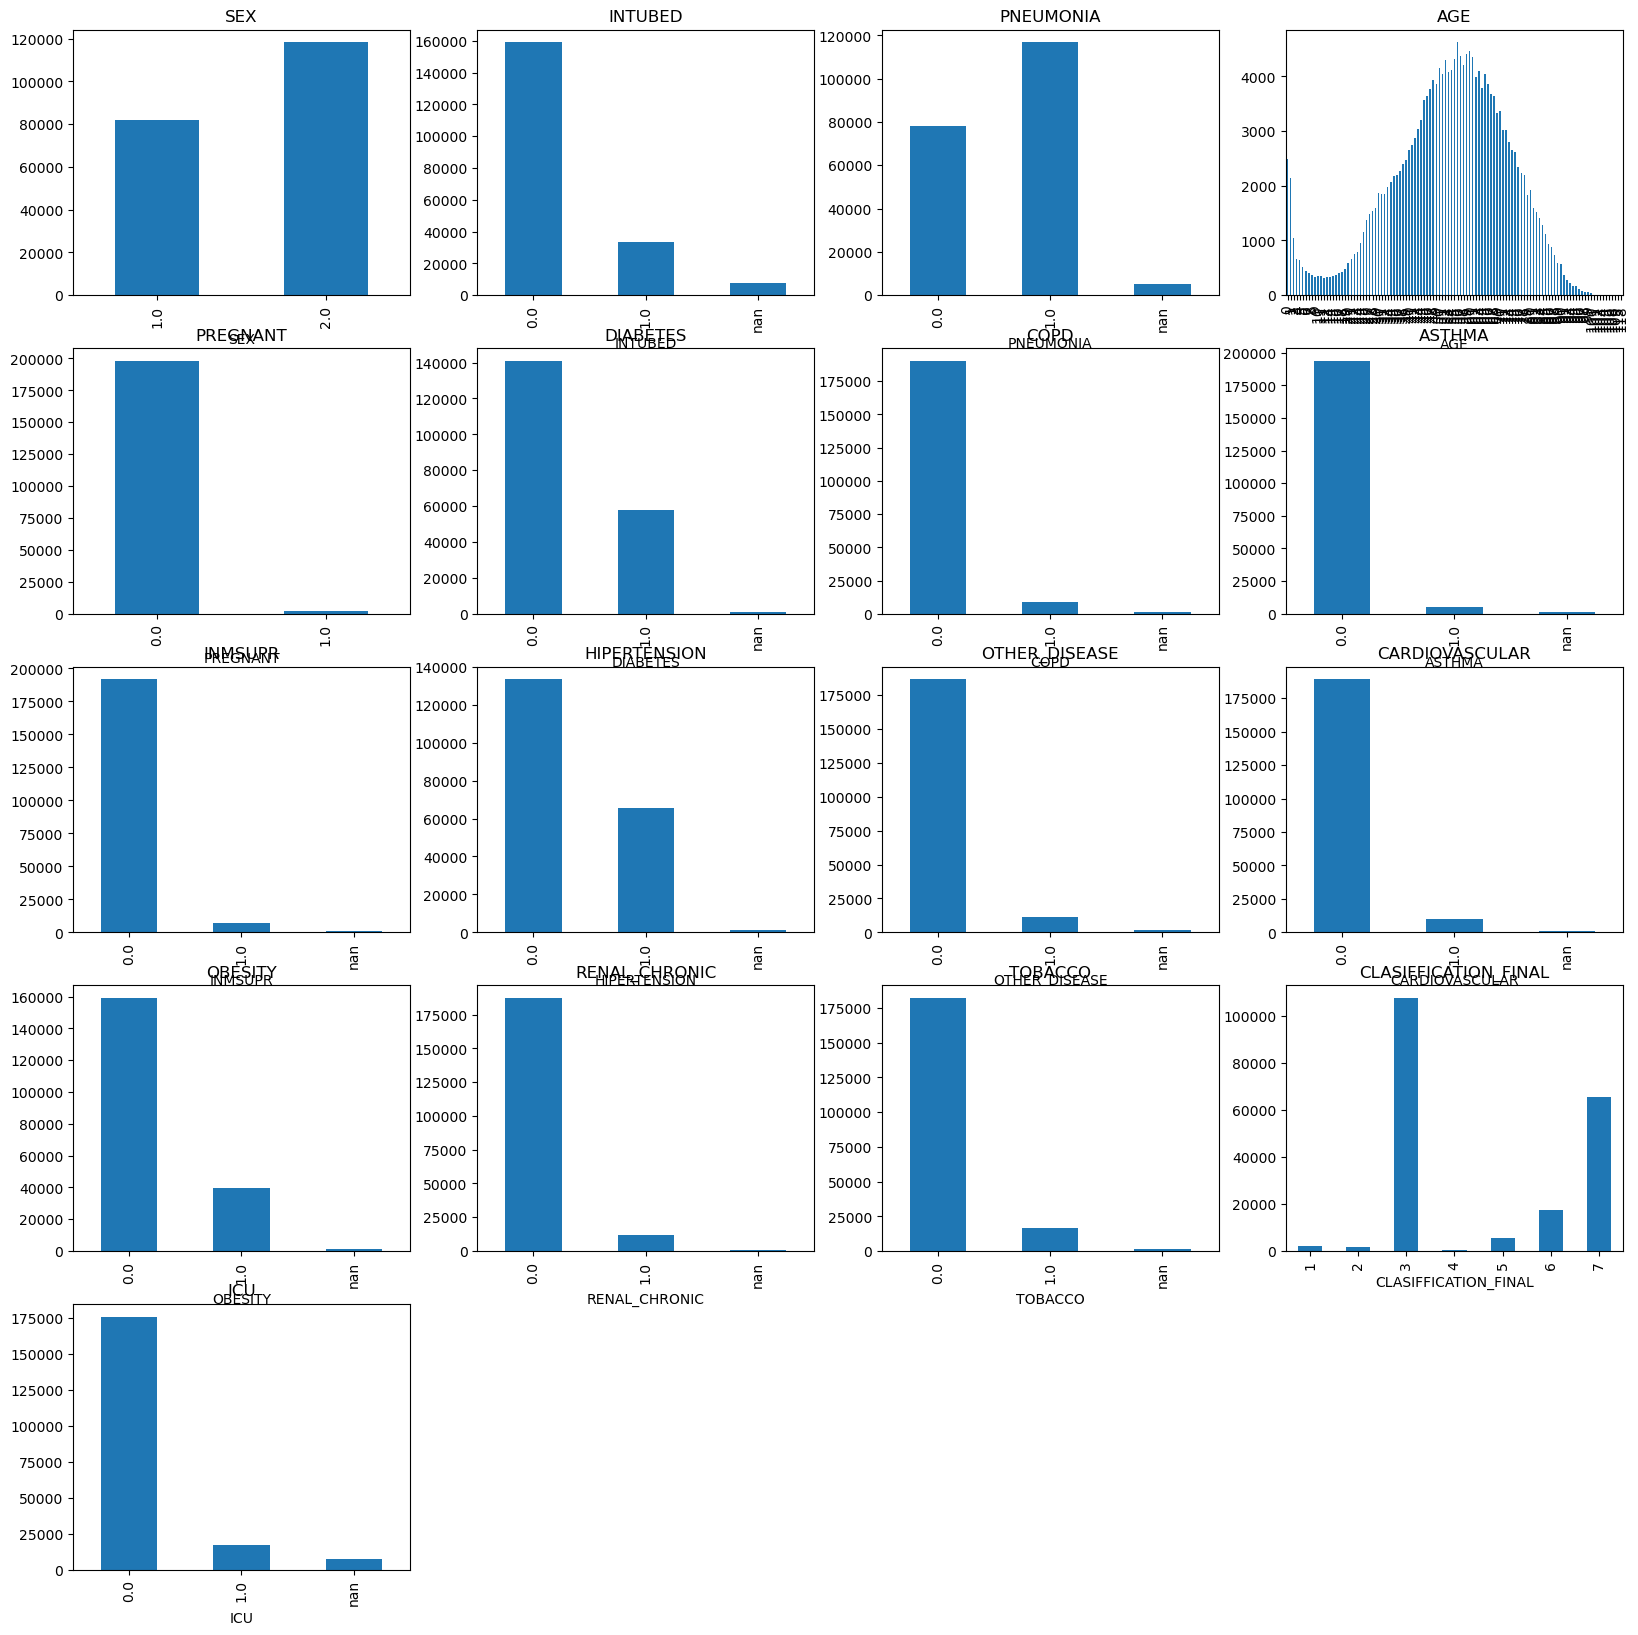

In [22]:
import modules.analytics_helper as ah

org_analytics_df = df_original[new_column_list].copy()
# analytics_df
# print(org_analytics_df['PNEUMONIA'])

ah.plot_multiple_metrics(df=org_analytics_df, columns=new_column_list, figsize=(20, 20))

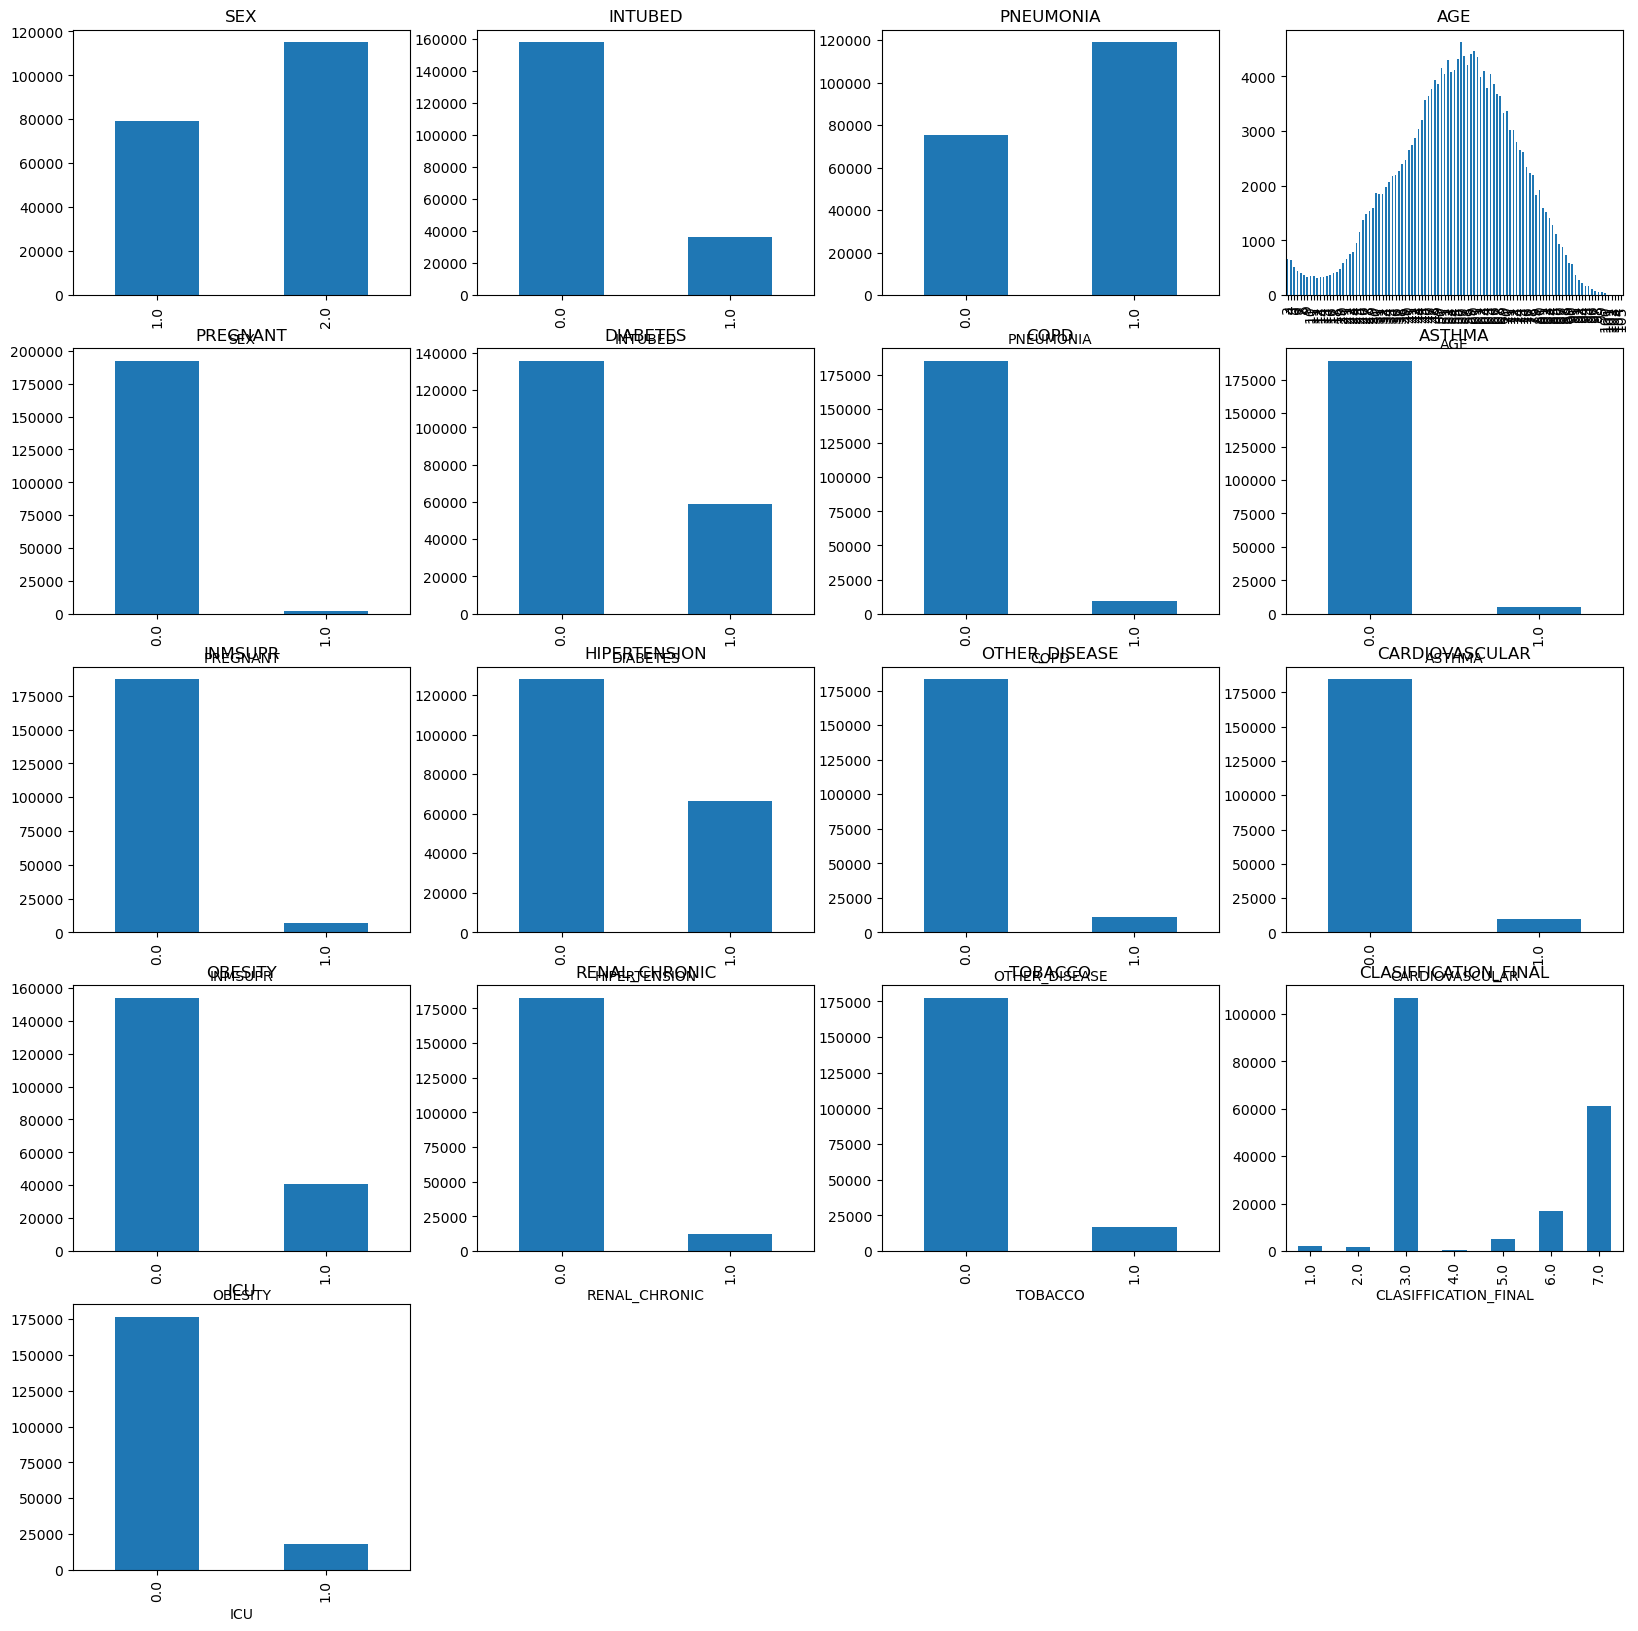

In [23]:
import modules.analytics_helper as ah

ah.plot_multiple_metrics(df=analytics_df, columns=new_column_list, figsize=(20, 20))

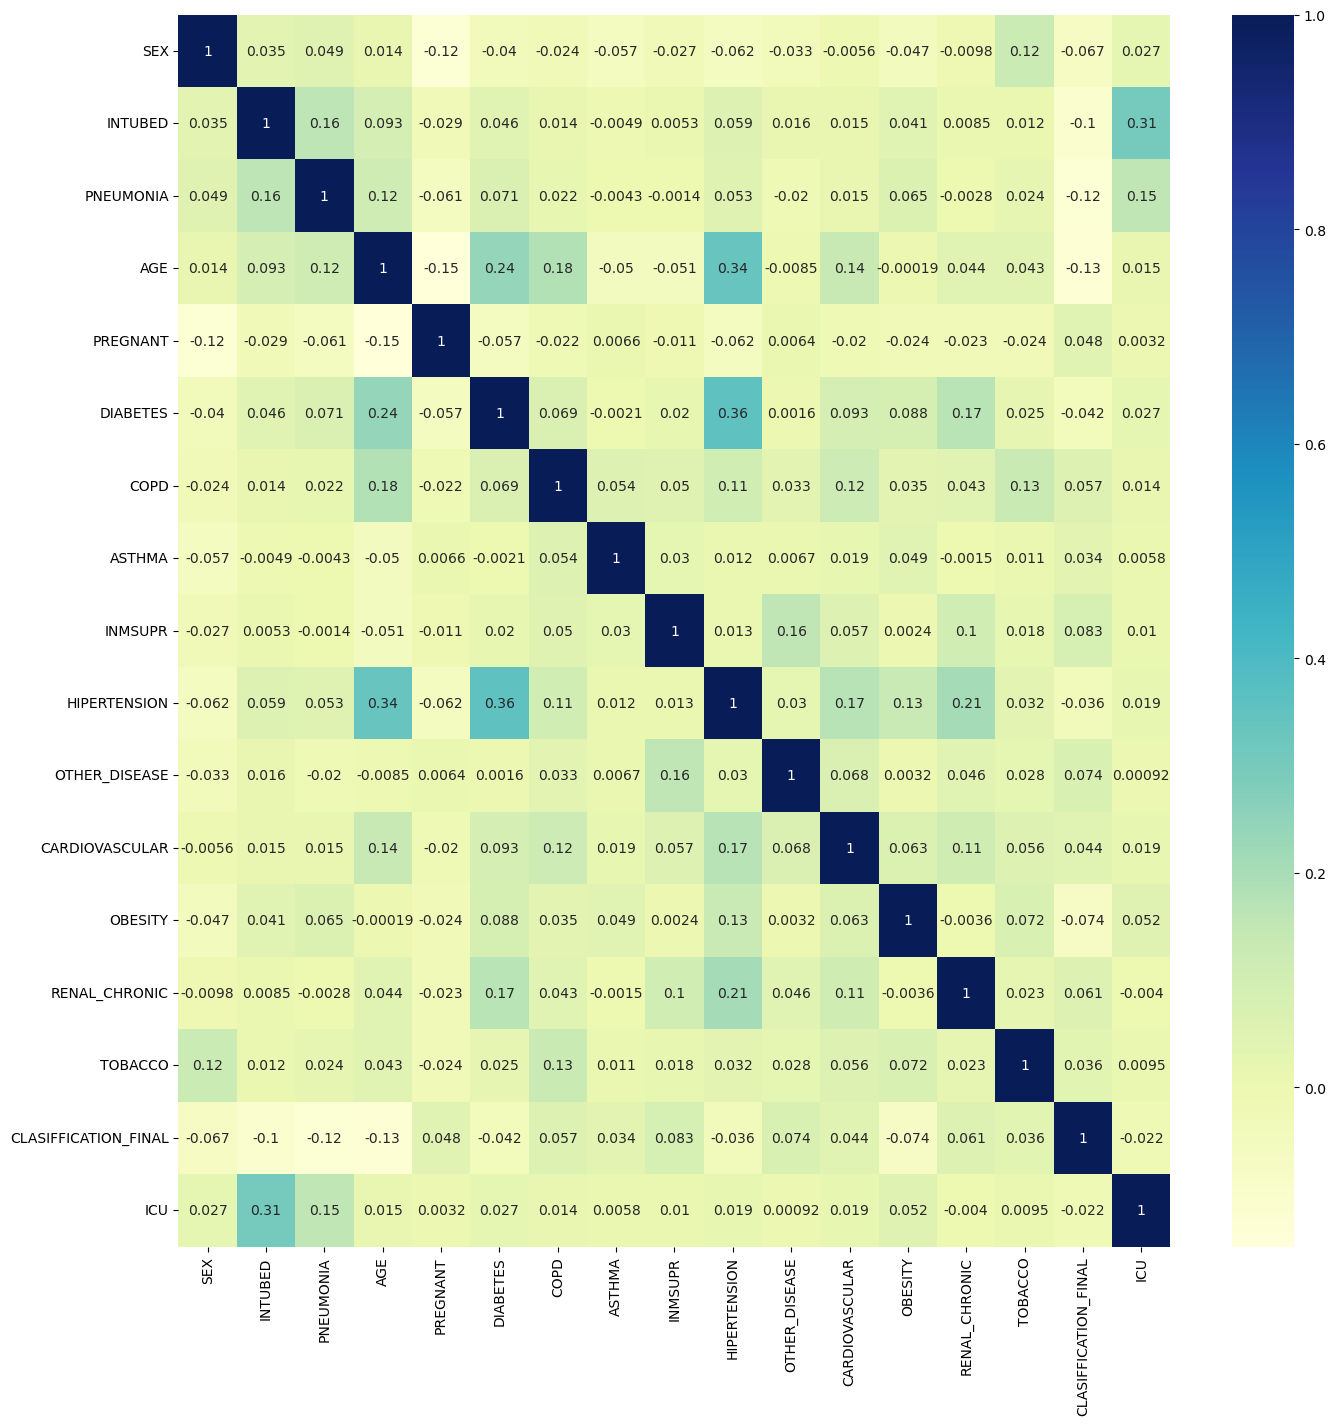

In [24]:
plt.figure(figsize=(16, 16))
co_mtx = analytics_df.corr(method ='pearson')

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()

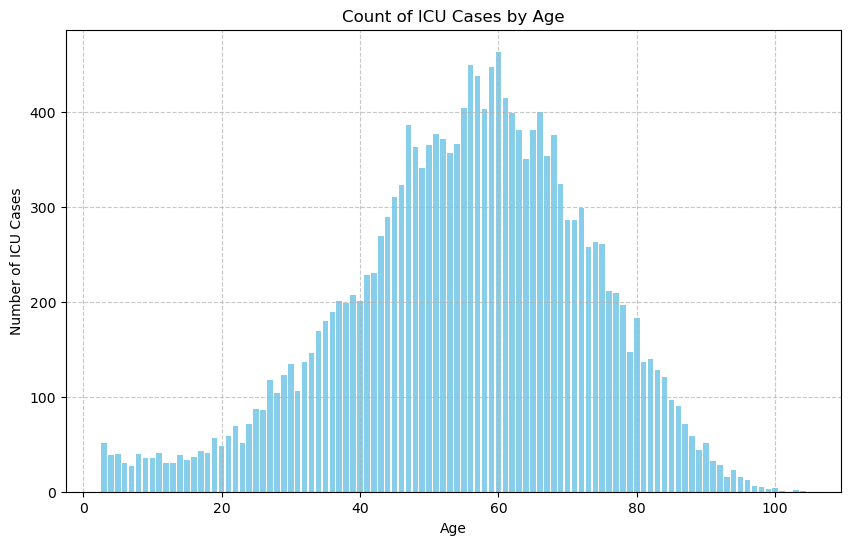

In [25]:
icu_by_age = analytics_df[analytics_df['ICU'] == 1.0].groupby('AGE').size().reset_index(name='ICU_Count')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(icu_by_age['AGE'], icu_by_age['ICU_Count'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of ICU Cases')
plt.title('Count of ICU Cases by Age')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### III/ Model

In [26]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif, VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
import modules.modeling as md
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score

# Discretize features into bins (e.g., 5 bins)
y = analytics_df['ICU']
X = analytics_df.drop(['ICU', 'CLASIFFICATION_FINAL'], axis=1)

analytics_df = analytics_df.drop(['CLASIFFICATION_FINAL'], axis=1)
# analytics_df['AGE'] = pd.cut(analytics_df['AGE'], bins=10, labels=False)


In [27]:
from collections import Counter

analytics_df = md.cleanDataForModeling(analytics_df)
occurence = []
count = 0
occurence = occurence + md.feature_selection_coefficient(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_mutual_info(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_anova(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_chi2(df=analytics_df, target_column='ICU', continuous_columns=[], select_k_best=6)
count = count + 1
print('-' * 100)
occurence = occurence + md.feature_selection_rfe(df=analytics_df, target_column='ICU', select_k_best=6)
count = count + 1
print('-' * 100)
select_feature_probability = dict(Counter(occurence))
select_feature_probability = {k:float(v/count) for k, v in select_feature_probability.items()}
print(select_feature_probability)

Correlations with target:
INTUBED           0.307864
PNEUMONIA         0.153503
OBESITY           0.051905
SEX               0.027343
DIABETES          0.026657
CARDIOVASCULAR    0.019496
HIPERTENSION      0.018897
AGE               0.015480
COPD              0.013944
INMSUPR           0.010276
TOBACCO           0.009495
ASTHMA            0.005786
PREGNANT          0.003193
OTHER_DISEASE     0.000925
RENAL_CHRONIC    -0.003966
dtype: float64
Top 6 features: ['INTUBED', 'PNEUMONIA', 'OBESITY', 'SEX', 'DIABETES', 'CARDIOVASCULAR']
----------------------------------------------------------------------------------------------------
Mutual Information Scores:
PNEUMONIA         0.042936
INTUBED           0.037306
SEX               0.031413
HIPERTENSION      0.013497
DIABETES          0.009075
OBESITY           0.006511
TOBACCO           0.001662
RENAL_CHRONIC     0.001471
OTHER_DISEASE     0.001181
INMSUPR           0.000711
AGE               0.000124
CARDIOVASCULAR    0.000068
COPD         

### Logistic Regression Model

#### 1. 5 chosen features: 'INTUBED', 'PNEUMONIA', 'OBESITY', 'SEX', 'DIABETES'

X_train shape: (136040, 5)
X_test shape: (58303, 5)
y_train shape: (136040,)
y_test shape: (58303,)
X_train shape after applying SMOTE: (247484, 5)
y_train shape after applying SMOTE: (247484,)
--------------------------------------------------
X_train shape: (136040, 5)
X_test shape: (58303, 5)
y_train shape: (136040,)
y_test shape: (58303,)
X_train shape after applying NearMiss (24596, 5)
y_train shape after applying NearMiss: (24596,)


<Axes: title={'center': 'ICU'}, xlabel='ICU'>

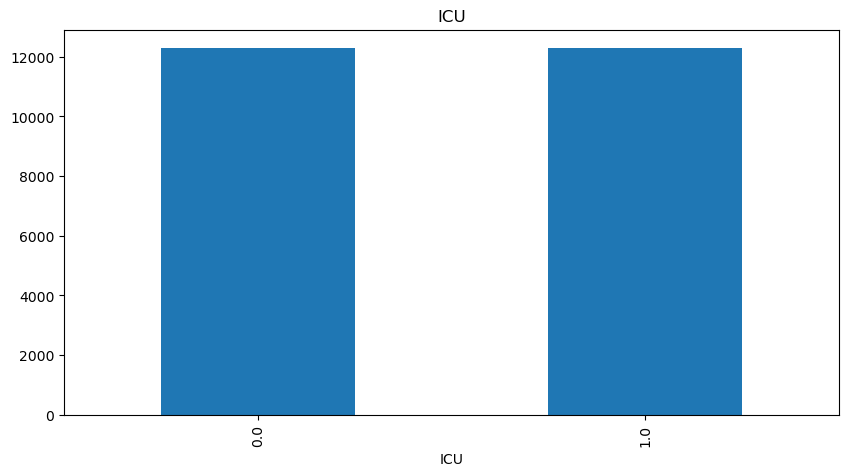

In [28]:
# 5 chosen features: 'INTUBED', 'PNEUMONIA', 'OBESITY', 'SEX', 'DIABETES'
analytics_df = analytics_df[['INTUBED', 'PNEUMONIA', 'OBESITY', 'SEX', 'DIABETES','ICU']]

#Apply MinMax Scaler
analytics_df = md.cleanDataForModeling(analytics_df)
y = analytics_df['ICU']
X = analytics_df.drop(['ICU'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y
                                                        , test_size=0.3
                                                        , random_state=42
                                                        , stratify=y)

X_over_train, X_over_test, y_over_train, y_over_test = md.generate_train_test_over_set(df=analytics_df, target_column='ICU', test_size=0.3)
print('-' * 50)
X_under_train, X_under_test, y_under_train, y_under_test = md.generate_train_test_under_set(df=analytics_df, target_column='ICU', test_size=0.3)
y_under_train.value_counts(dropna=False).sort_index().plot(kind='bar', title='ICU', figsize=(10, 5))

##### Apply Logistic Regression model to original dataset

/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

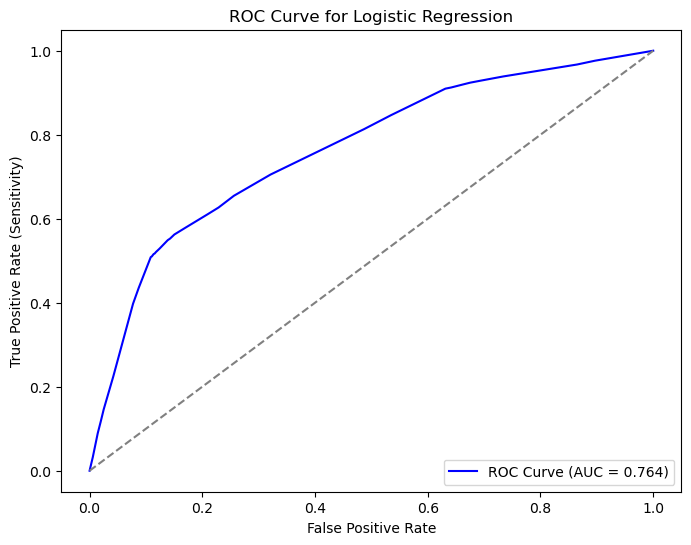


Model: Logistic Regression
Training Accuracy: 0.909600117612467
Test Accuracy: 0.9096101401300105

Cross-Validation Accuracy Scores: [0.90962217 0.90962217 0.90958542 0.90958542 0.90958542]
Mean CV Accuracy Score: 0.909600117612467
Standard Deviation of CV Scores: 1.800565820922097e-05
ROC AUC Score: 0.7640167013550083


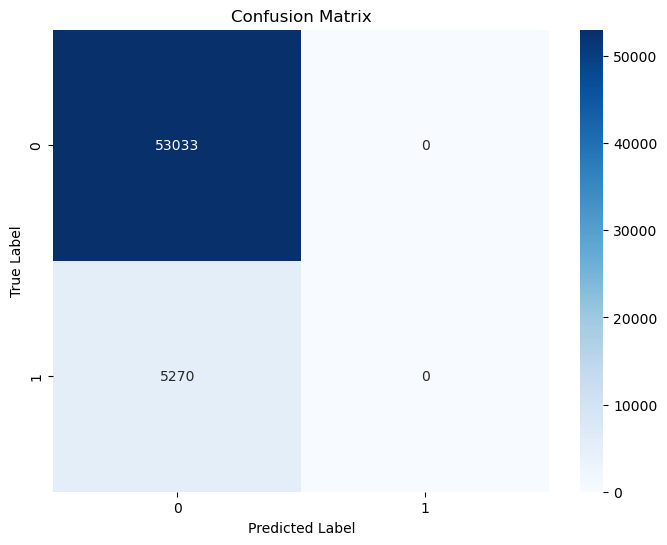


Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     53033
         1.0       0.00      0.00      0.00      5270

    accuracy                           0.91     58303
   macro avg       0.45      0.50      0.48     58303
weighted avg       0.83      0.91      0.87     58303


Overall Test Set Metrics (for class 1: ICU admitted):
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC Score: 0.7640167013550083


/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LogisticRegression(max_iter=2000, random_state=42, solver='liblinear')

In [29]:
md.logistic_regression_model(training_set={'X': X_train, 'Y': y_train} , test_set={'X': X_test, 'Y': y_test}, solver='liblinear', class_weight=None) #{0:1, 1:5}

##### Apply Logistic Regression model to oversampling dataset

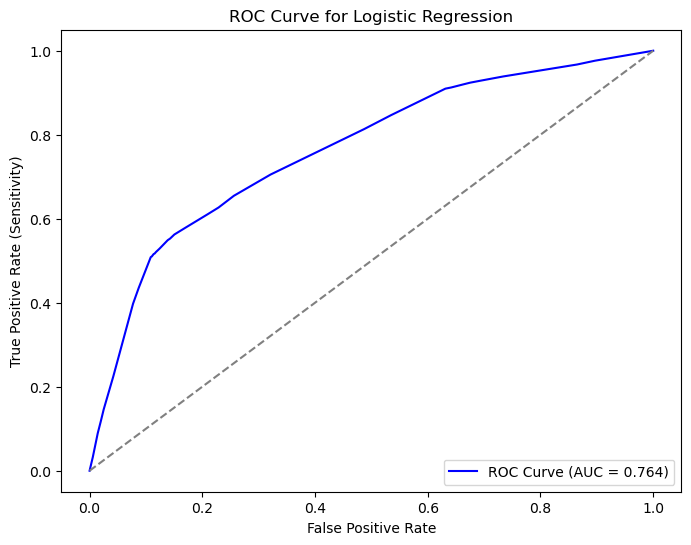


Model: Logistic Regression
Training Accuracy: 0.7118520793263403
Test Accuracy: 0.8236282867090887

Cross-Validation Accuracy Scores: [0.70913389 0.7129725  0.7098208  0.7110936  0.7162397 ]
Mean CV Accuracy Score: 0.7118520970551595
Standard Deviation of CV Scores: 0.0025532918676587366
ROC AUC Score: 0.7640167013550083


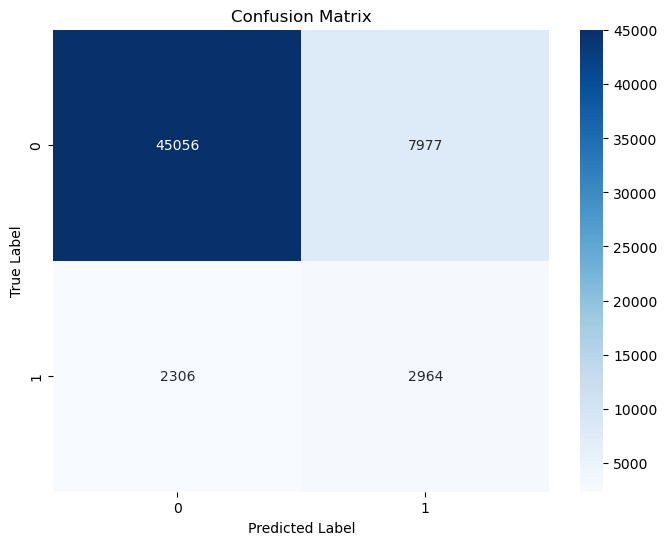


Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90     53033
         1.0       0.27      0.56      0.37      5270

    accuracy                           0.82     58303
   macro avg       0.61      0.71      0.63     58303
weighted avg       0.89      0.82      0.85     58303


Overall Test Set Metrics (for class 1: ICU admitted):
Precision: 0.2709075952837949
Recall: 0.5624288425047438
F1-Score: 0.3656776263031275
ROC AUC Score: 0.7640167013550083


LogisticRegression(max_iter=2000, random_state=42, solver='liblinear')

In [30]:
md.logistic_regression_model(training_set={'X': X_over_train, 'Y': y_over_train}
                       , test_set={'X': X_over_test, 'Y': y_over_test}
                       , solver='liblinear', class_weight=None)

##### Apply Logistic Regression model to undersampling dataset

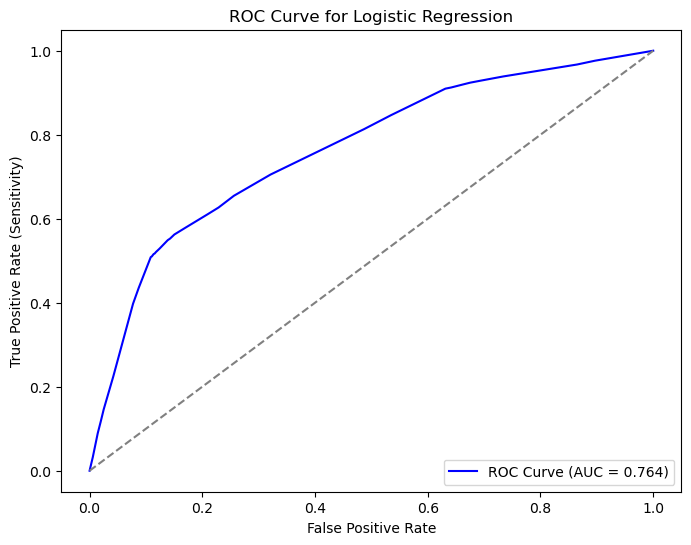


Model: Logistic Regression
Training Accuracy: 0.7088957554073834
Test Accuracy: 0.8236282867090887

Cross-Validation Accuracy Scores: [0.7148374  0.69851596 0.70441147 0.71620248 0.71071356]
Mean CV Accuracy Score: 0.7089361724985415
Standard Deviation of CV Scores: 0.0066307862230251
ROC AUC Score: 0.7640167013550083


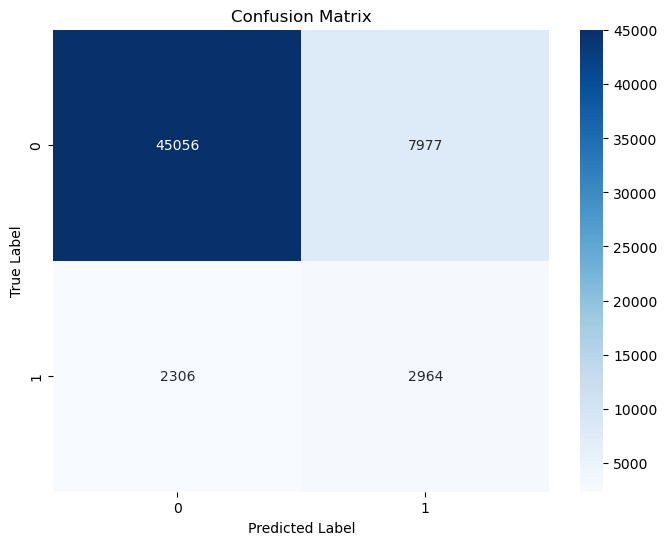


Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90     53033
         1.0       0.27      0.56      0.37      5270

    accuracy                           0.82     58303
   macro avg       0.61      0.71      0.63     58303
weighted avg       0.89      0.82      0.85     58303


Overall Test Set Metrics (for class 1: ICU admitted):
Precision: 0.2709075952837949
Recall: 0.5624288425047438
F1-Score: 0.3656776263031275
ROC AUC Score: 0.7640167013550083


LogisticRegression(max_iter=2000, random_state=42, solver='liblinear')

In [31]:
md.logistic_regression_model(training_set={'X': X_under_train, 'Y': y_under_train} 
                       , test_set={'X': X_under_test, 'Y': y_under_test}
                       , solver='liblinear', class_weight=None)

#### 2. 5 chosen features: 'INTUBED', 'PNEUMONIA', 'OBESITY', 'SEX', 'DIABETES'

In [32]:
# 5 chosen features: 'INTUBED', 'PNEUMONIA', 'OBESITY', 'SEX', 'DIABETES'
analytics_df = analytics_df[['INTUBED', 'PNEUMONIA', 'OBESITY', 'SEX', 'DIABETES','ICU']]

#Apply MinMax Scaler
analytics_df = md.cleanDataForModeling(analytics_df)
y = analytics_df['ICU']
X = analytics_df.drop(['ICU'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y
                                                        , test_size=0.3
                                                        , random_state=42
                                                        , stratify=y)

X_over_train, X_over_test, y_over_train, y_over_test = md.generate_train_test_over_set(df=analytics_df, target_column='ICU', test_size=0.3)
print('-' * 50)
X_under_train, X_under_test, y_under_train, y_under_test = md.generate_train_test_under_set(df=analytics_df, target_column='ICU', test_size=0.3)

X_train shape: (136040, 5)
X_test shape: (58303, 5)
y_train shape: (136040,)
y_test shape: (58303,)
X_train shape after applying SMOTE: (247484, 5)
y_train shape after applying SMOTE: (247484,)
--------------------------------------------------
X_train shape: (136040, 5)
X_test shape: (58303, 5)
y_train shape: (136040,)
y_test shape: (58303,)
X_train shape after applying NearMiss (24596, 5)
y_train shape after applying NearMiss: (24596,)


Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     53033
         1.0       0.00      0.00      0.00      5270

    accuracy                           0.91     58303
   macro avg       0.45      0.50      0.48     58303
weighted avg       0.83      0.91      0.87     58303


Feature Importance:
Feature 1: 0.7902
Feature 2: 0.1743
Feature 3: 0.0222
Feature 4: 0.0093
Feature 5: 0.0040


/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/conda-env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

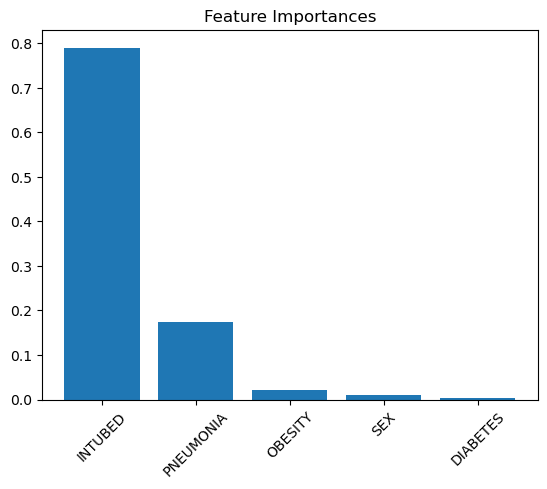

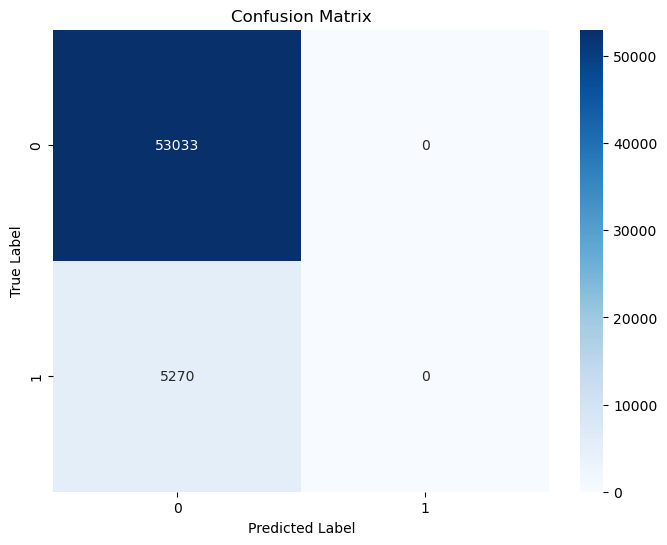

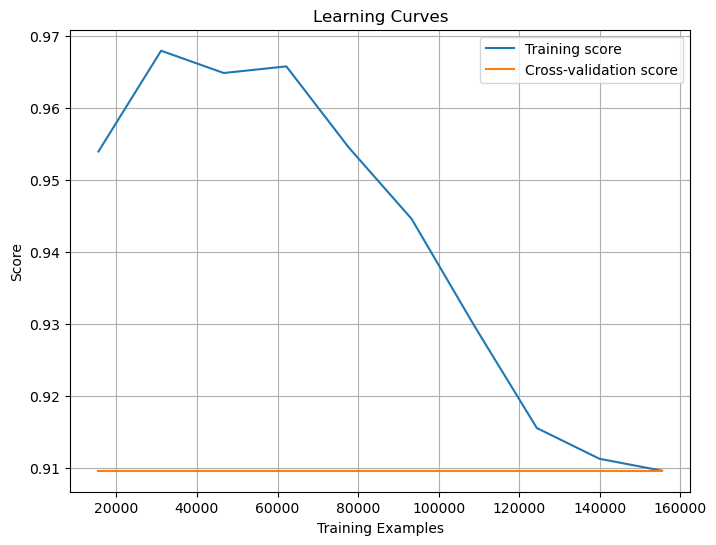

Training accuracy: 0.9096
Test accuracy: 0.9096


In [33]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Create and train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=50  # number of trees
                                    #   max_depth=10,      # maximum depth of trees
                                    , min_samples_split= 2
                                    , random_state=42)   # for reproducibility

# Fit the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_over_test, y_pred))

# Feature importance
feature_importance = rf_classifier.feature_importances_
print("\nFeature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: {importance:.4f}")

# Plot feature importances
import matplotlib.pyplot as plt
plt.bar(X.columns, feature_importance)
plt.xticks(rotation=45)
plt.title("Feature Importances")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Learning curves to assess if more data would help
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf_classifier, X, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10))

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# # Example with hyperparameters tuning using GridSearchCV
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# # Create GridSearchCV object
# grid_search = GridSearchCV(RandomForestClassifier(n_estimators=50  # number of trees
#                                                   , min_samples_split= 2
#                                       ,max_depth=None,random_state=42),
#                           param_grid,
#                           cv=5,
#                           scoring='accuracy')

# # Fit the grid search
# grid_search.fit(X_train, y_train)

# # Print best parameters and score
# print("\nBest parameters:", grid_search.best_params_)
# print("Best cross-validation score:", grid_search.best_score_)

# # Use best model for prediction
# best_model = grid_search.best_estimator_
# y_pred_best = best_model.predict(X_test)
# print(f"Accuracy with best model: {accuracy_score(y_test, y_pred_best):.2f}")

# Check for overfitting
train_pred = rf_classifier.predict(X_train)
print(f"Training accuracy: {accuracy_score(y_train, train_pred):.4f}")
print(f"Test accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 0.80

Feature Importance:
Feature 1: 0.7092
Feature 2: 0.2550
Feature 3: 0.0212
Feature 4: 0.0068
Feature 5: 0.0078


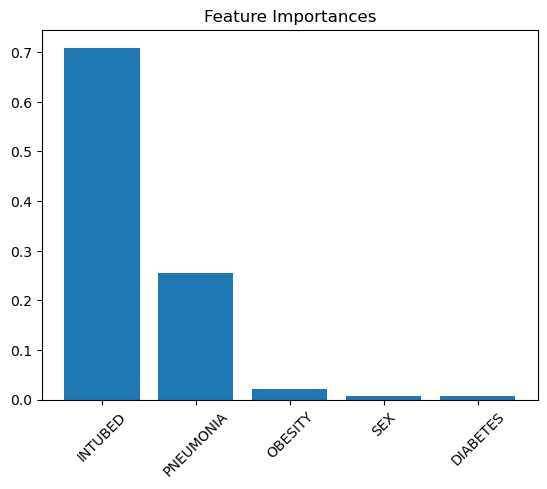

Training accuracy: 0.7100
Test accuracy: 0.8048


In [34]:
# Create and train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=50  # number of trees
                                    #   max_depth=10,      # maximum depth of trees
                                    , min_samples_split= 2,
                                      random_state=42)   # for reproducibility

# Fit the model
rf_classifier.fit(X_under_train, y_under_train)

# Make predictions
y_pred = rf_classifier.predict(X_under_test)

# Calculate accuracy
accuracy = accuracy_score(y_under_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Feature importance
feature_importance = rf_classifier.feature_importances_
print("\nFeature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: {importance:.4f}")

# Plot feature importances
import matplotlib.pyplot as plt
plt.bar(X.columns, feature_importance)
plt.xticks(rotation=45)
plt.title("Feature Importances")
plt.show()

# # Example with hyperparameters tuning using GridSearchCV
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# # Create GridSearchCV object
# grid_search = GridSearchCV(RandomForestClassifier(n_estimators=50  # number of trees
#                                                   , min_samples_split= 2
#                                       ,max_depth=None,random_state=42),
#                           param_grid,
#                           cv=5,
#                           scoring='accuracy')

# # Fit the grid search
# grid_search.fit(X_under_train, y_under_train)

# # Print best parameters and score
# print("\nBest parameters:", grid_search.best_params_)
# print("Best cross-validation score:", grid_search.best_score_)

# # Use best model for prediction
# best_model = grid_search.best_estimator_
# y_pred_best = best_model.predict(X_over_test)
# print(f"Accuracy with best model: {accuracy_score(y_under_test, y_pred_best):.2f}")


# Check for overfitting
train_pred = rf_classifier.predict(X_under_train)
print(f"Training accuracy: {accuracy_score(y_under_train, train_pred):.4f}")
print(f"Test accuracy: {accuracy_score(y_under_test, y_pred):.4f}")

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89     53033
         1.0       0.25      0.59      0.35      5270

    accuracy                           0.80     58303
   macro avg       0.60      0.71      0.62     58303
weighted avg       0.89      0.80      0.84     58303

Training accuracy: 0.7126
Test accuracy: 0.8048
Accuracy: 0.80

Feature Importance:
Feature 1: 0.7293
Feature 2: 0.2395
Feature 3: 0.0207
Feature 4: 0.0046
Feature 5: 0.0059


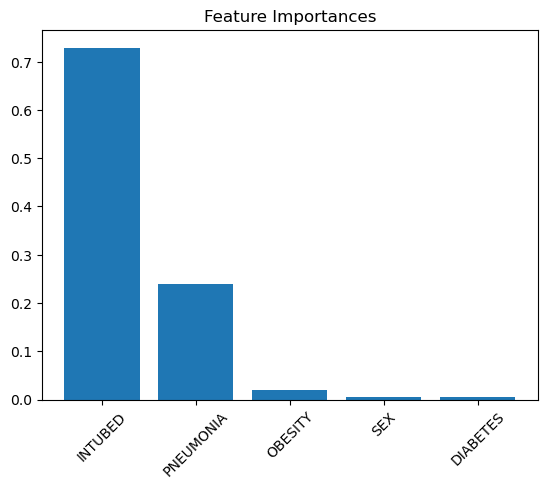

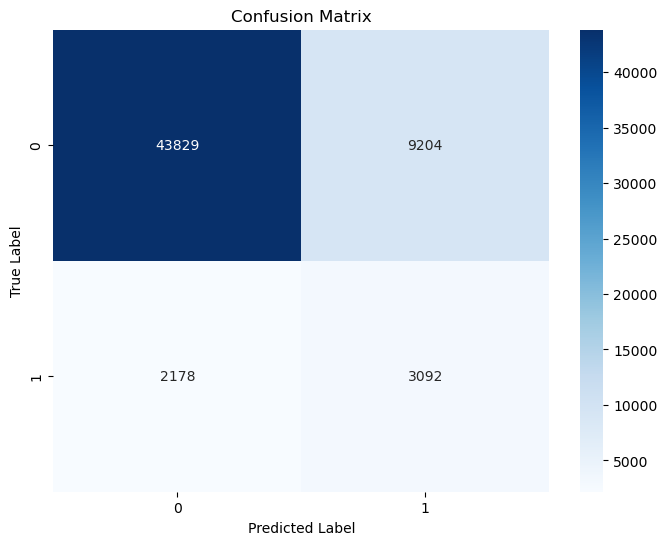

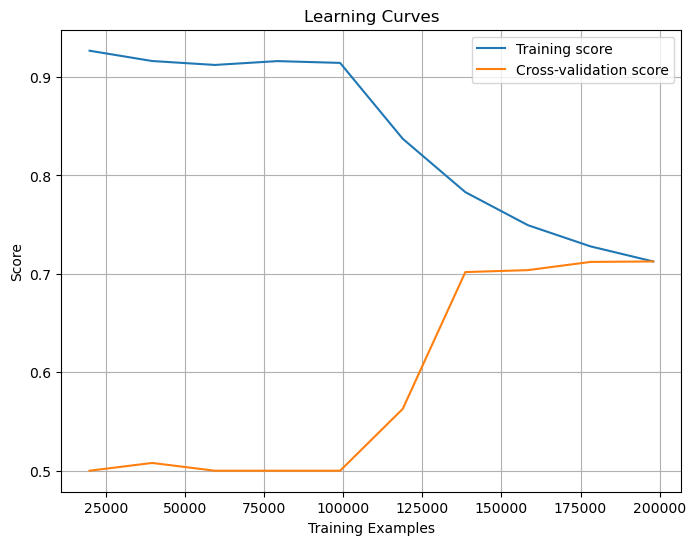

In [35]:
# Create and train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=50  # number of trees
                                       , min_samples_split= 2,
                                    #   max_depth=10,      # maximum depth of trees
                                      random_state=42)   # for reproducibility

# Fit the model
rf_classifier.fit(X_over_train, y_over_train)

# Make predictions
y_pred = rf_classifier.predict(X_over_test)

# Calculate accuracy
accuracy = accuracy_score(y_under_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_over_test, y_pred))

# Check for overfitting
train_pred = rf_classifier.predict(X_over_train)
print(f"Training accuracy: {accuracy_score(y_over_train, train_pred):.4f}")
print(f"Test accuracy: {accuracy_score(y_over_test, y_pred):.4f}")

# Calculate accuracy
accuracy = accuracy_score(y_over_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Feature importance
feature_importance = rf_classifier.feature_importances_
print("\nFeature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: {importance:.4f}")

# Plot feature importances
import matplotlib.pyplot as plt
plt.bar(X.columns, feature_importance)
plt.xticks(rotation=45)
plt.title("Feature Importances")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_over_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Learning curves to assess if more data would help
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf_classifier, X_over_train, y_over_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10))

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# # Example with hyperparameters tuning using GridSearchCV
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# # Create GridSearchCV object
# grid_search = GridSearchCV(RandomForestClassifier(n_estimators=50  # number of trees
#                                                   , min_samples_split= 2
#                                       ,max_depth=None,random_state=42),
#                           param_grid,
#                           cv=5,
#                           scoring='accuracy')

# # Fit the grid search
# grid_search.fit(X_over_train, y_over_train)

# # Print best parameters and score
# print("\nBest parameters:", grid_search.best_params_)
# print("Best cross-validation score:", grid_search.best_score_)

# # Use best model for prediction
# best_model = grid_search.best_estimator_
# y_pred_best = best_model.predict(X_over_test)
# print(f"Accuracy with best model: {accuracy_score(y_over_test, y_pred_best):.2f}")
